/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


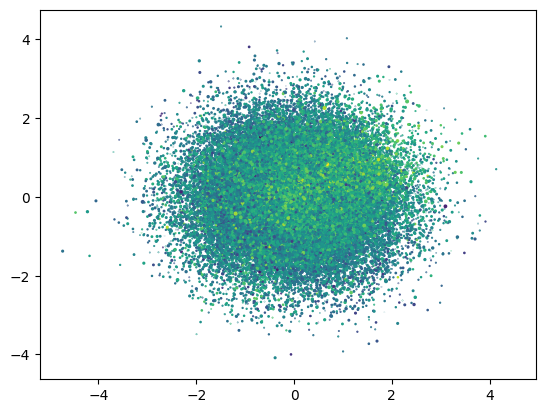

In [19]:
import pandas as pd
from matplotlib import pyplot
from sklearn.cluster import KMeans

# Read the dataset from CSV
df = pd.read_csv('data.csv')  # Update 'your_dataset.csv' with your actual file path

# define the model
kmeans_model = KMeans(n_clusters=4)

# assign each data point to a cluster
kmeans_result = kmeans_model.fit_predict(df[['f_00', 'f_01', 'f_02', 'f_03']])

# Add the cluster labels to the DataFrame
df['Cluster'] = kmeans_result

# get all of the unique clusters
kmeans_clusters = df['Cluster'].unique()

# plot the KMeans clusters
for kmeans_cluster in kmeans_clusters:
    # get data points that fall in this cluster
    cluster_data = df[df['Cluster'] == kmeans_cluster]
    # make the plot
    pyplot.scatter(cluster_data['f_00'], cluster_data['f_01'], cluster_data['f_02'], cluster_data['f_03'])

# show the KMeans plot
pyplot.show()


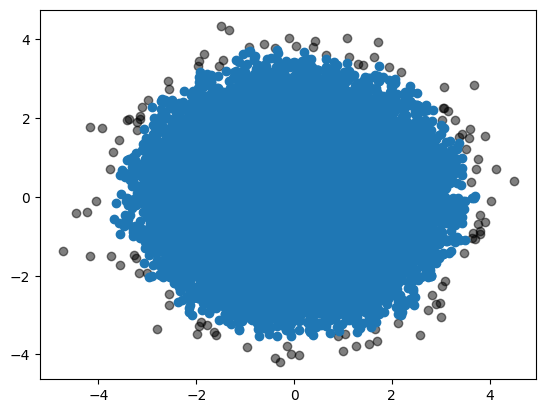

In [10]:
import pandas as pd
from numpy import unique, where
from matplotlib import pyplot
from sklearn.cluster import DBSCAN

# Read the dataset from CSV
df = pd.read_csv('data.csv')  # Update 'your_dataset.csv' with your actual file path

# Extract the features from the DataFrame
training_data = df[['f_00', 'f_01']].values

# define the model
dbscan_model = DBSCAN(eps=0.25, min_samples=9)

# train the model
dbscan_model.fit(training_data)

# get cluster labels
dbscan_labels = dbscan_model.labels_

# get all of the unique clusters
dbscan_clusters = unique(dbscan_labels)

# plot the DBSCAN clusters
for dbscan_cluster in dbscan_clusters:
    if dbscan_cluster == -1:
        # Plot noise points in black
        noise_indices = where(dbscan_labels == dbscan_cluster)
        pyplot.scatter(training_data[noise_indices, 0], training_data[noise_indices, 1], c='black', alpha=0.5)
    else:
        # get data points that fall in this cluster
        cluster_indices = where(dbscan_labels == dbscan_cluster)
        # make the plot
        pyplot.scatter(training_data[cluster_indices, 0], training_data[cluster_indices, 1])

# show the DBSCAN plot
pyplot.show()
